# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv(r'data/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


# Train Test Split

In [7]:
X = df.drop('package', axis=1)
y = df['package']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (40, 1), (160,), (40,))

# Visualization

## Distribution of cgpa

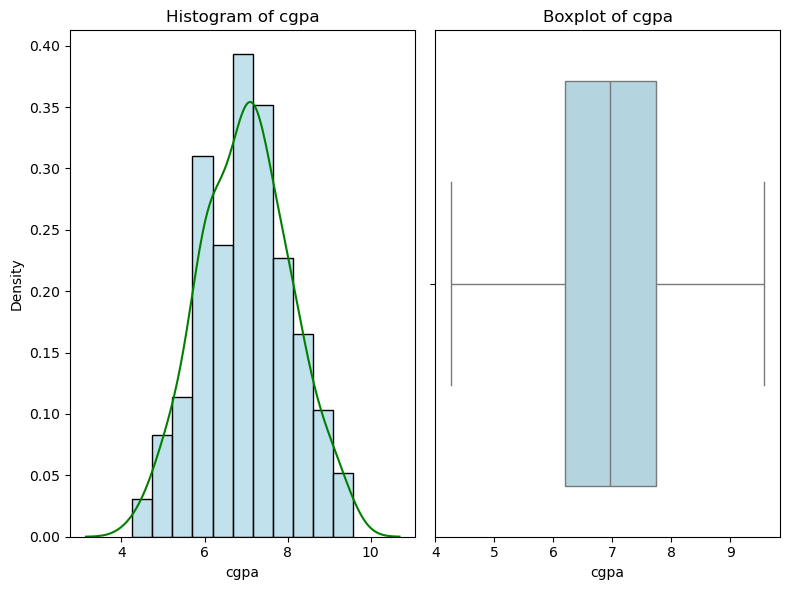

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

sns.histplot(data=df, x='cgpa', stat='density', color='lightblue', ax=ax[0])
sns.kdeplot(data=df, x='cgpa', color='green', ax=ax[0])
ax[0].set_title('Histogram of cgpa')

sns.boxplot(data=df, x='cgpa', color='lightblue', ax=ax[1])
ax[1].set_title('Boxplot of cgpa')

plt.tight_layout()
plt.show()

* No outliers, data is almost normal distribution

## Scatter Plot - cgpa vs package

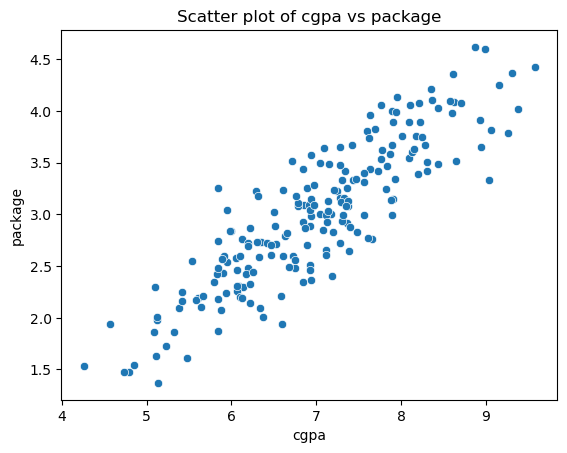

In [11]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.title('Scatter plot of cgpa vs package')
plt.show();

* Data is almost linear

# Linear Regression

In [12]:
lr = LinearRegression()

## Fit the model

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

## Prediction on test data

In [14]:
y_pred = lr.predict(X_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

## Visualize best fit line

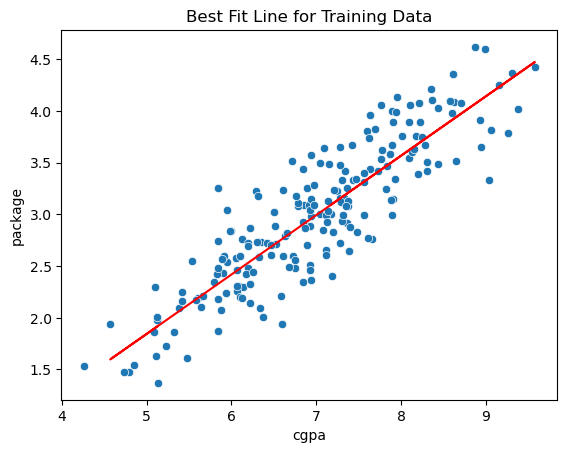

In [15]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title('Best Fit Line for Training Data')
plt.show();

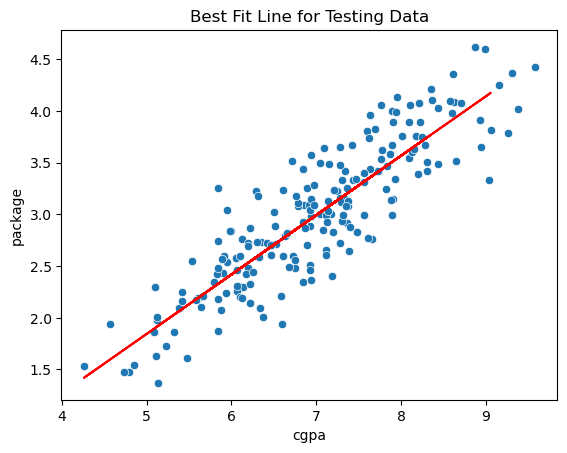

In [16]:
sns.scatterplot(data=df, x='cgpa', y='package')
plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('Best Fit Line for Testing Data')
plt.show();

## Slope and Intercept

In [17]:
m = lr.coef_
print('Slope of best fit line: ', m)

Slope of best fit line:  [0.57425647]


In [18]:
b = lr.intercept_
print('Y-Intercept: ', b)

Y-Intercept:  -1.02700693745421


## Test on new data

In [19]:
predicted_package = lr.predict([[7.82]])
predicted_package

array([3.46367868])

In [20]:
# y = mx + b
m * 7.82 + 2.99 

array([7.48068562])